In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
import umap
import umap.plot

# Fetching data

In [36]:
from sklearn.datasets import fetch_20newsgroups   #to fetch dataset for our nlp project

raw_posts = fetch_20newsgroups(subset='all', shuffle=True, random_state=24, remove=('headers', 'footers', 'quotes'))


print("Sample post text:\n{0}\n{1}\n{0}".format('-' * 80, raw_posts.data[19]))

Sample post text:
--------------------------------------------------------------------------------
:My wife's ob-gyn has an ultrasound machine in her office.  When
:the doctor couldn't hear a fetal heartbeat (13 weeks) she used
:the ultrasound to see if everything was ok.  (it was)
:
:On her next visit, my wife asked another doctor in the office if
:they read the ultrasounds themselves or if they had a radiologist
:read the pictures.  The doctor very vehemently insisted that they
:were qualified to read the ultrasound and radiologists were NOT!
:
:[stuff deleted]

This is one of those sticky areas of medicine where battles frequently
rage.  With respect to your OB, I suspect that she has been certified in
ultrasound diagnostics, and is thus allowed to use it and bill for its
use.  Many cardiologists also use ultrasound (echocardiography), and are
in fact considered by many to be the 'experts'.  I am not sure where OBs
stand in this regard, but I suspect that they are at least as good a

In [37]:
categories=[raw_posts.target_names[x]for x in raw_posts.target]
categoriesdf=pd.DataFrame(categories,columns=['category'])
categoriesdf.head()

,category
0,sci.electronics
1,comp.os.ms-windows.misc
2,soc.religion.christian
3,rec.motorcycles
4,talk.politics.mideast


# Preprocessing

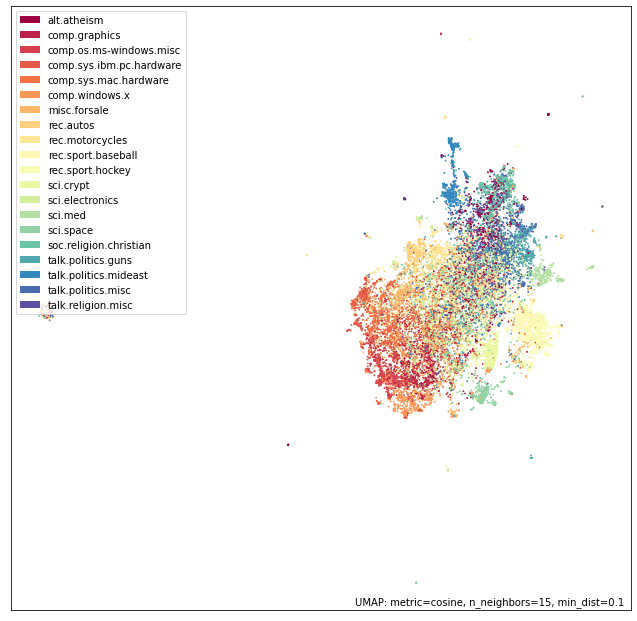

In [38]:
#Using TF-IDF to vectorize the texts and to remove stopwords
vectorizer=CountVectorizer(min_df=5, stop_words='english')
word_matrix= vectorizer.fit_transform(raw_posts.data)

embed=umap.UMAP(n_components=2,metric='cosine').fit(word_matrix)
f=umap.plot.points(embed, labels=categoriesdf['category'])

In [40]:
print("Sample post text:\n{0}\n{1}\n{0}".format('-' * 80, raw_posts.data[320]))

Sample post text:
--------------------------------------------------------------------------------

       Horrors, appealing to popular principles.  Can we perhaps as the
question of whether the Constitution might have been written to appeal
to the principles, rather than, as you appear to believe, it was written
with something else in mind and "propoganda" put out by its supporters.

       But let's be honest about something, here.  When was the last time
you brought up all the valid points against your own arguments?

       Or are they simply propogranda?  We can't know what Phill *really*
means because he's obviously using arguments designed to convince.


       If they're true or false, regardles of why they were said, why
on earth did you make a point of calling them "propogranda?"  That
would seem to be irrelevent.


       Oh, I have no argument with questioning them.  I don't believe
they no longer apply, but that's because I think most of them were
good arguments.  I'm not

In [41]:
import sklearn.cluster as cluster
import numpy as np

In [44]:
kmeans_labels=cluster.KMeans(n_clusters=40).fit_predict(word_matrix)
kmeans_labels

array([20, 20, 20, ..., 20, 20, 20])

In [45]:
def cluster_content(data, label_list, label, number):
    hits=0
    for idx, document in enumerate(data):
        if kmeans_labels[idx] ==label:
            if hits < number:
                category= raw_posts.target_names[raw_posts.target[idx]]
                print(f'Category: {category}')
                print(document) 
                hits +=1      

In [58]:
number_of_docs = 1
label = 9

cluster_content(raw_posts.data, kmeans_labels, label, number_of_docs) #to view content in the 9th cluster


Category: rec.sport.hockey
Individual leaders by total points (Final standings)
    NOTE: Games played and points per games not accurate !!

    Player       Team   GP  G   A  Pts ppg  Prj PIM +/-

    M.Lemieux    PIT    59  69  91 160 2.71 160  38  53
    LaFontaine   BUF    82  53  95 148 1.80 148  63  13
    Oates        BOS    83  45  97 142 1.71 142  32  12
    Yzerman      DET    83  58  79 137 1.65 137  44  33
    Turgeon      NYI    80  58  74 132 1.65 132  26  -2
    Selanne      WIN    82  76  56 132 1.61 132  45   6
    Mogilny      BUF    75  76  51 127 1.69 127  40   9
    Gilmour      TOR    81  32  95 127 1.57 127  96  32
    Robitaille   LA     82  63  62 125 1.52 127 100  16
    Recchi       PHI    81  53  70 123 1.52 123  95  -2
    Sundin       QUE    79  47  67 114 1.44 114  96  19
    Stevens      PIT    71  55  57 112 1.58 112 169  16
    Bure         VAN    82  60  50 110 1.34 110  67  37
    Tocchet      PIT    79  48  61 109 1.38 109 240  28
    Roenick      C

In [ ]:
from sentence_transformers import SentenceTransformer 
